Grafo original com 10 nós:
Arestas do grafo original: [(0, 2), (1, 4), (2, 5), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (3, 5), (3, 4), (3, 7), (4, 9), (4, 5), (5, 7), (6, 9), (6, 8), (8, 9)]


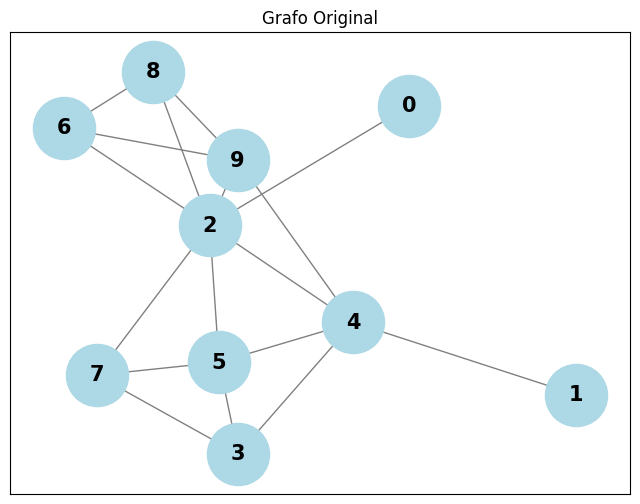

Número de arestas removíveis mantendo o grafo ligado: 8
Arestas removíveis: {(2, 4), (3, 4), (2, 7), (2, 6), (2, 5), (6, 9), (3, 5), (2, 8)}
Grafo resultante após remoção das arestas:


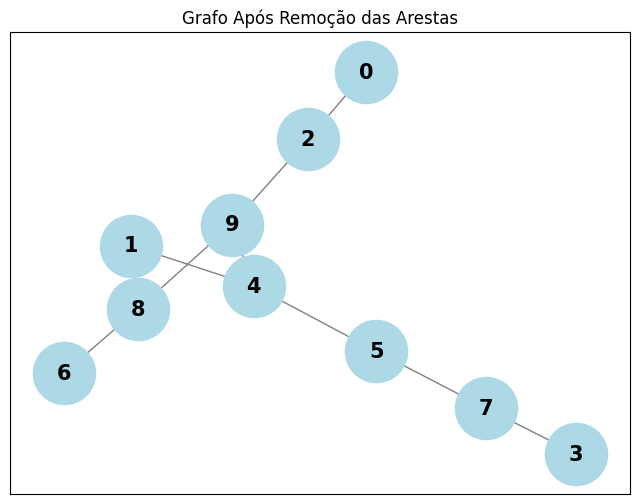

In [24]:
from IPython import get_ipython
from IPython.display import display
import networkx as nx
import random
import matplotlib.pyplot as plt
from itertools import combinations

def generate_strongly_connected_graph(N):
    while True:
        G = nx.Graph()

        # Adicionar os nós
        G.add_nodes_from(range(N))

        # Conectar cada nó com 1 a 3 descendentes
        for node in G.nodes():
            num_descendants = random.randint(1, 3)
            potential_descendants = []  # Lista para armazenar descendentes potenciais

            # Encontrar descendentes potenciais
            for n in G.nodes():
                if n != node and not G.has_edge(node, n):
                    potential_descendants.append(n)

            # Selecionar descendentes aleatórios
            descendants = []
            number_of_choices = min(num_descendants, len(potential_descendants))
            if number_of_choices > 0:
                selected_indices = random.sample(range(len(potential_descendants)), number_of_choices)
                for index in selected_indices:
                    descendants.append(potential_descendants[index])

            # Adicionar as arestas entre o nó e seus descendentes
            for descendant in descendants:
                G.add_edge(node, descendant)

        # Verificar se o grafo é conectado
        if nx.is_connected(G):
            return G

def find_max_removable_edges(G):
    max_removable_edges = set()
    # Verifica todas as combinações de arestas do grafo
    for i in range(len(G.edges()), 0, -1):
        for edge_set in combinations(G.edges(), i):
            G_temp = G.copy()
            G_temp.remove_edges_from(edge_set)
            if nx.is_connected(G_temp):
                return set(edge_set)
    return max_removable_edges

def plot_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', font_weight='bold')

    plt.title(title)
    plt.show()

# Geração do grafo
N = random.randint(6, 10)
G = generate_strongly_connected_graph(N)

print(f"Grafo original com {N} nós:")
print(f"Arestas do grafo original: {list(G.edges())}")
plot_graph(G, "Grafo Original")

# Encontrar arestas removíveis
removable_edges = find_max_removable_edges(G)

# Criar um novo grafo após a remoção das arestas
G_result = G.copy()
G_result.remove_edges_from(removable_edges)

print(f"Número de arestas removíveis mantendo o grafo ligado: {len(removable_edges)}")
print(f"Arestas removíveis: {removable_edges}")

# Verificar se as arestas removíveis existem no grafo original
for edge in removable_edges:
    if not G.has_edge(*edge):
        print(f"Erro: a aresta {edge} não existe no grafo original!")

print("Grafo resultante após remoção das arestas:")
plot_graph(G_result, "Grafo Após Remoção das Arestas")
